In [23]:
import math, cmath
import os
from typing import Optional, Tuple, Union

from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

%matplotlib inline

## Bifurcation Map

- implement the map, plot the
evolution of x
- play around with values of r, see the
change of evolution
- then create a linspace of r’s, for every
r save last “m” values of x after first
“n” values (can be m=200, x=200),
play around with values
- get the bifurcation map
- vizualize the evolution (play around)

In [24]:
def generate_next_x(x: float, r: float) -> float:
    return r * x * (1 - x)


def run_experinemt(
    r: float,
    n_steps: int = 1000,
    x_init: Optional[float] = None,
    n_last_values: int = 200
) -> list:
    if x_init is None:
        x_init = np.random.rand()

    xs = np.zeros(n_steps)
    xs[0] = x_init

    for i in range(1, len(xs)):
        xs[i] = generate_next_x(xs[i - 1], r)

    return xs[-n_last_values:]

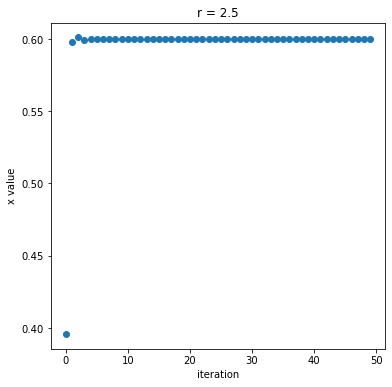

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

r = 2.5

x_experiment = run_experinemt(r, n_steps=50, n_last_values=50)
ax.scatter(np.arange(len(x_experiment)), x_experiment)

ax.set_ylabel('x value')
ax.set_xlabel('iteration')
ax.set_title(f'r = {r}')
fig.show()

In [26]:
r_values = np.linspace(0, 4, 4000)

n_last_values = 300
n_values = 1000
x_exp = []

for r in tqdm(r_values):
    x_exp.append(run_experinemt(r, n_values, x_init=None, n_last_values=n_last_values))

100%|██████████| 4000/4000 [00:01<00:00, 3762.43it/s]


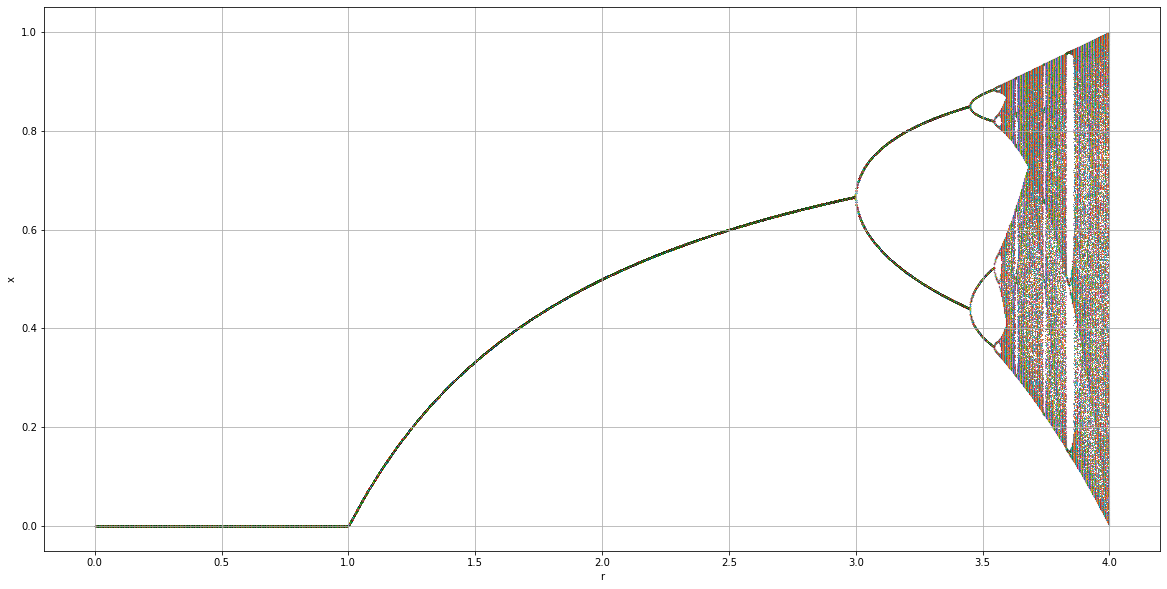

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.grid()
ax.set_xlabel('r')
ax.set_ylabel('x')

for r, exp in zip(r_values, x_exp):
    ax.scatter(np.ones_like(exp) * r, exp, cmap='autumn', marker='.', s=2, linewidths=0.3)

fig.show()

In [36]:
IMG_SAVEPATH = 'img'
os.makedirs(IMG_SAVEPATH, exist_ok=True)

In [37]:
fig.savefig(os.path.join(IMG_SAVEPATH, 'mandelbrot.png'))

## Julia set

- fix a value of C (can be 0)
- implement the map, plot the
evolution of z (Re(z), Im(z))
- play around with values of z0, see the
change of evolution
- for a given z0 if the sequence
converges use black color, if it
exponentially diverges use white
color, if it starts jumping between “n”
values use different colors
- plot the Julia set

In [38]:
def generate_next_z(z: complex, c: complex=0) -> complex:
    return z ** 2 + c

def run_julia_experiment(z_init: complex, c: complex=0, n_steps: int=100, z_bound: Optional[int] = None):
    z_r = []
    z_i = []
    z = z_init
    
    for i in range(1000):
        if z_bound is not None and cmath.polar(z)[0] > z_bound:
            break
        z = generate_next_z(z, c)
        z_r.append(z.real)
        z_i.append(z.imag)
        
    return z_r, z_i, i

def viz_julia_experiment(z_real: list, z_imag: list, c:int, figsize=(8, 8)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.plot(z_real, z_imag, '.')
    ax.set_xlabel('$\Re(z)$')
    ax.set_ylabel('$\Im(z)$')

    ax.set_title('$z_{n+1} = z_n^2 + c$' + '\t' * 4 + f'c = {c}')
    return fig

Toy example

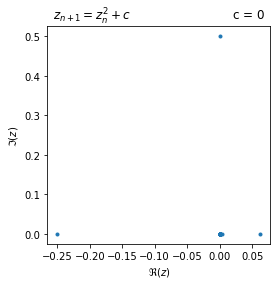

In [39]:
z = 0.5 + 0.5j
c = 0

z_real, z_imag, _ = run_julia_experiment(z, c)
viz_julia_experiment(z_real, z_imag, c, figsize=(4, 4)).show()

### Static example from wiki

https://en.wikipedia.org/wiki/Julia_set

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Julia_0.285_0.01.png" width="300" height="200"/>

In [40]:
def generate_julia_image(c: complex, z_mod_bound: int=2, img_size_side: int=500, n_steps=100):
    res = np.linspace(-1.5, 1.5, imsize)
    ims = np.linspace(-1.5, 1.5, imsize)

    image = np.zeros((imsize, imsize))

    for i, r in enumerate(res):
        for j, im in enumerate(ims):   
            exp_res, exp_ims, stop_iter = run_julia_experiment(complex(r, im), c, n_steps, z_mod_bound)

            image[i][j] = stop_iter / n_steps  # vary brightness by iterations
    return image

In [41]:
from matplotlib.ticker import FormatStrFormatter

def plot_julia_image(image: np.ndarray, figsize: Tuple[int]=(10, 10), fontsize: int=12):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.imshow(image, cmap='binary')
    ax.set_xlabel('$\Re(z)$', fontsize=fontsize)
    ax.set_ylabel('$\Im(z)$', fontsize=fontsize)
    ax.set_title('$z_{n+1} = z_n^2 + c$' + '\t' * 4 + f'c = {c}', fontsize=fontsize)

    ticks = np.arange(0, imsize + 100, 100)

    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ticks_labels = [f'{tick:.2f}' for tick in np.linspace(-1.5, 1.5, int(imsize / 100) + 1)]

    ax.set_xticklabels(ticks_labels)
    ax.set_yticklabels(ticks_labels)

    return fig

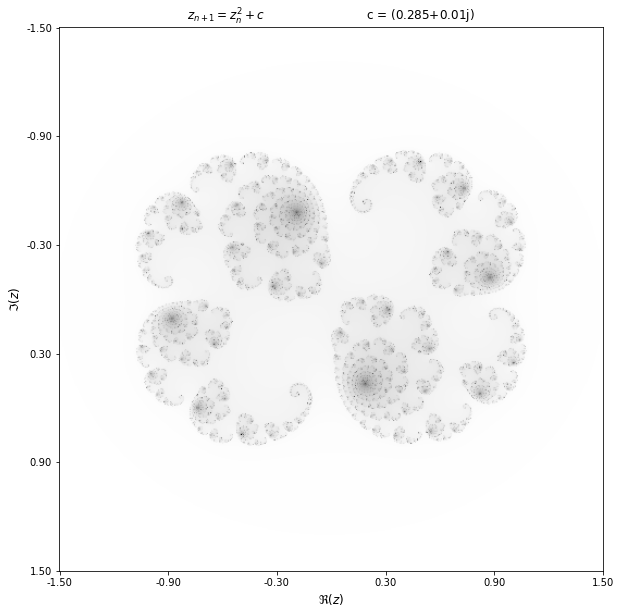

In [45]:
c = 0.285 + 0.01j  # wiki example

imsize = 500
z_mod_bound = 2


img = generate_julia_image(c, z_mod_bound)

julia_fig = plot_julia_image(img, figsize=(14, 11), fontsize=12)

In [46]:
julia_fig.savefig(os.path.join(IMG_SAVEPATH, 'julia.png'))

### Golden ratio example

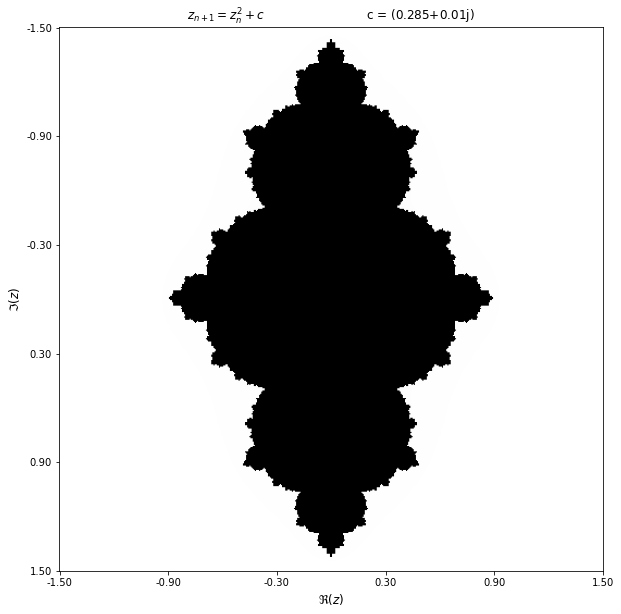

In [47]:
phi = (1 + cmath.sqrt(5)) / 2

img = generate_julia_image(complex(1 - phi, 0), z_mod_bound)
plot_julia_image(img, figsize=(14, 11), fontsize=12).show()

### Mandelbrot

In [48]:
n_steps = 500
z_mod_bound = 2
imsize = 500

res = np.linspace(-1.5, 1.5, imsize)
ims = np.linspace(-1.5, 1.5, imsize)

image = np.zeros((imsize, imsize))

for i, r in enumerate(res):
    for j, im in enumerate(ims): 
        exp_res, exp_ims, stop_iter = run_julia_experiment(0, complex(r, im), n_steps, z_mod_bound)

        image[i][j] = stop_iter / n_steps  # vary brightness by iterations

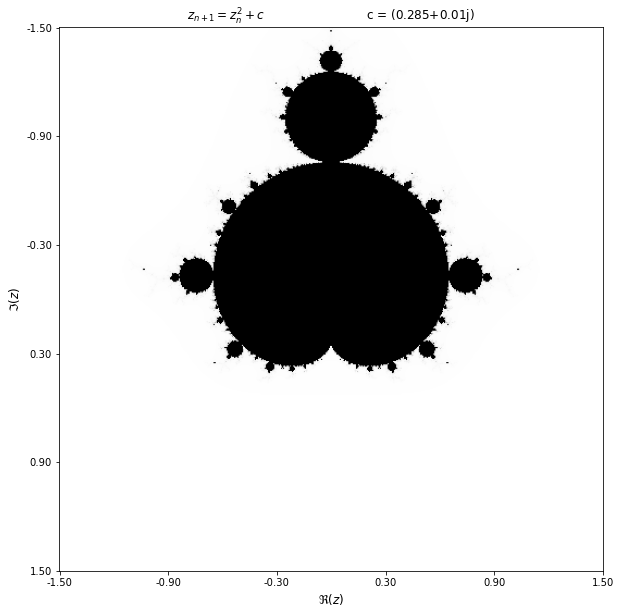

In [49]:
plot_julia_image(image, figsize=(14, 11), fontsize=12).show()

### Animated

In [50]:
a = np.linspace(0, 2 * math.pi, 60)

In [51]:
frames = []
for param in tqdm(a):
    c = cmath.exp(param * 1j)
    img = generate_julia_image(c, n_steps=1000)
    frames.append(img)

100%|██████████| 60/60 [01:09<00:00,  1.15s/it]


In [60]:
import imageio

In [ ]:
img_path = os.path.join(IMG_SAVEPATH, 'julia_images')
os.makedirs(img_path, exist_ok=True)
for i, img in enumerate(tqdm(frames)):
    img = plot_julia_image(img)
    img.savefig(os.path.join(img_path, f'{i}.png'))

In [64]:
gif_images = []
for i in range(len(frames)):
    gif_images.append(imageio.imread(os.path.join(img_path, f'{i}.png')))

imageio.mimsave(os.path.join(IMG_SAVEPATH, 'julia.gif'), gif_images, duration=0.15)

/tmp/ipykernel_12325/4198776744.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(os.path.join(img_path, f'{i}.png')))


##  Schelling model

1) Suppose there are two types of agents: X and O. Two populations of the two
agent types are initially placed into random locations of a neighborhood
represented by a grid. After placing all the agents in the grid, each cell is either
occupied by an agent or is empty.

2) Now we must determine if each agent is satisfied with its current location. A
satisfied agent is one that is surrounded by at least t percent of agents that are
like itself. This threshold t is one that will apply to all agents in the model.

3) When an agent is not satisfied, it can be moved to any vacant location in the grid.
Any algorithm can be used to choose this new location. For example, a randomly
selected cell may be chosen, or the agent could move to the nearest available
location.

4) All dissatisfied agents must be moved in the same round. After the round is complete,
a new round begins, and dissatisfied agents are once again moved to new locations in the grid.

 

Steps:
1. Randomize the map with half white/half black
2. define the value of R (0, ⅛, 2/8, ⅜, 4/8, ⅝,6/8,⅞, 1), start the game
3. on each step for each cell find out if the cell wants to move - this
cell is now on the market (considered free for moving in)
4. after you finished with the whole map - cells that want to move
can move into free cells
5. repeat the whole procedure

In [65]:
def is_cell_satisfied(grid: np.ndarray, x: int, y: int, satis_ratio: float) -> bool:
    n_neighbours = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            n_neighbours += grid[(x + i) % grid.shape[0],
                                 (y + j) % grid.shape[1]]

    if n_neighbours / 8 < satis_ratio:
        return False
    else:
        return True


def make_cell_step(grid: np.ndarray, x: int, y: int):
    available_locations = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            if grid[(x + i) % grid.shape[0]][(y + j) % grid.shape[1]] == 0:
                available_locations.append(
                    ((x + i) % grid.shape[0], (y + j) % grid.shape[1]))
    
    if available_locations:
        new_location = available_locations[np.random.randint(0, len(available_locations))]
    else:
        matched = False
        while not matched:
            rand_x = np.random.randint(0, grid.shape[0])
            rand_y = np.random.randint(0, grid.shape[1])
            if grid[rand_x][rand_y] == 0:
                new_location = (rand_x, rand_y)
                matched = True
            
    grid[x][y] = 0
    grid[new_location[0], new_location[1]] = 1


def simulate_model_step(grid: np.ndarray, satis_ratio: float):

    new_grid = grid.copy()

    moving_candidates = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x][y] == 1 and not is_cell_satisfied(grid, x, y, satis_ratio):
                moving_candidates.append((x, y))

    for candidate in moving_candidates:
        make_cell_step(new_grid, candidate[0], candidate[1])
    
    return new_grid, len(moving_candidates)


def create_grid(size: int, bw_ratio: float):
    grid = np.zeros((size**2))
    grid[:int(size**2 * bw_ratio)] += 1
    np.random.shuffle(grid)
    grid = grid.reshape((size, size))
    return grid


def simulate_schelling_experiment(
    grid_size: int,
    n_rounds: int,
    satis_ratio: float,
    black_white_ratio: float = 0.5
):
    grid = create_grid(grid_size, black_white_ratio)
    game_log = [grid]
    candidates_log = []
    
    for round_num in tqdm(range(n_rounds)):
        new_grid, moved = simulate_model_step(grid, satis_ratio)
        game_log.append(new_grid)
        candidates_log.append(moved)
        
    return game_log, candidates_log

def plot_schelling_grid(image: np.ndarray, figsize: Tuple[int]=(10, 10), fontsize: int=12):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    ax.imshow(image, cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig

### Run experiments for different satisfaction ratios

In [66]:
satisfaction_ratios = [i / 8 for i in range(9)]

In [ ]:
grid_size = 150
n_rounds = 50

schelling_img_path = os.path.join(IMG_SAVEPATH, 'schelling_images')
switches_logs = []

os.makedirs(schelling_img_path, exist_ok=True)

for ratio in tqdm(satisfaction_ratios):
    game_log, switches_log = simulate_schelling_experiment(grid_size, n_rounds, ratio)
    switches_logs.append(switches_log)
    
    experiment_path = os.path.join(schelling_img_path, f'ratio_{ratio}')
    os.makedirs(experiment_path, exist_ok=True)
    
    for i, img in enumerate(game_log):
        img = plot_schelling_grid(img)
        img.savefig(os.path.join(experiment_path, f'{i}.png'))

### Create gifs

In [71]:
for ratio in tqdm(satisfaction_ratios):
    gif_images = []
    experiment_path = os.path.join(schelling_img_path, f'ratio_{ratio}') 

    for i in range(n_rounds):
        gif_images.append(imageio.imread(os.path.join(experiment_path, f'{i}.png')))

    imageio.mimsave(os.path.join(schelling_img_path, f'schelling_{ratio}.gif'), gif_images, duration=0.15)

  0%|          | 0/9 [00:00<?, ?it/s]/tmp/ipykernel_12325/358144337.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(os.path.join(experiment_path, f'{i}.png')))
100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


### Plot switches over time for different satisfaction ratios

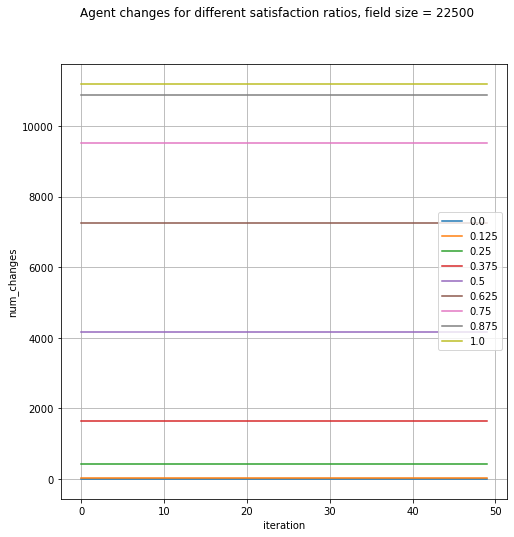

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for label, sw in zip(satisfaction_ratios, switches_logs):
    ax.plot(sw, label=label)
    ax.grid()
    ax.legend()

ax.set_ylabel('num_changes')
ax.set_xlabel('iteration')

fig.suptitle(f'Agent changes for different satisfaction ratios, field size = {grid_size**2}')
fig.show()

In [23]:
import math, cmath
import os
from typing import Optional, Tuple, Union

from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

%matplotlib inline

## Bifurcation Map

- implement the map, plot the
evolution of x
- play around with values of r, see the
change of evolution
- then create a linspace of r’s, for every
r save last “m” values of x after first
“n” values (can be m=200, x=200),
play around with values
- get the bifurcation map
- vizualize the evolution (play around)

In [24]:
def generate_next_x(x: float, r: float) -> float:
    return r * x * (1 - x)


def run_experinemt(
    r: float,
    n_steps: int = 1000,
    x_init: Optional[float] = None,
    n_last_values: int = 200
) -> list:
    if x_init is None:
        x_init = np.random.rand()

    xs = np.zeros(n_steps)
    xs[0] = x_init

    for i in range(1, len(xs)):
        xs[i] = generate_next_x(xs[i - 1], r)

    return xs[-n_last_values:]

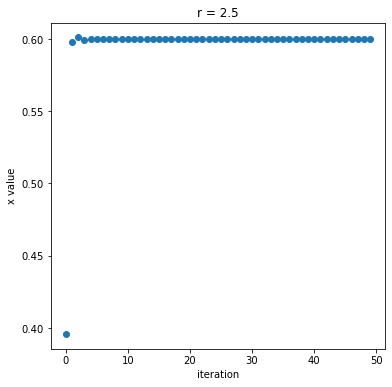

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

r = 2.5

x_experiment = run_experinemt(r, n_steps=50, n_last_values=50)
ax.scatter(np.arange(len(x_experiment)), x_experiment)

ax.set_ylabel('x value')
ax.set_xlabel('iteration')
ax.set_title(f'r = {r}')
fig.show()

In [26]:
r_values = np.linspace(0, 4, 4000)

n_last_values = 300
n_values = 1000
x_exp = []

for r in tqdm(r_values):
    x_exp.append(run_experinemt(r, n_values, x_init=None, n_last_values=n_last_values))

100%|██████████| 4000/4000 [00:01<00:00, 3762.43it/s]


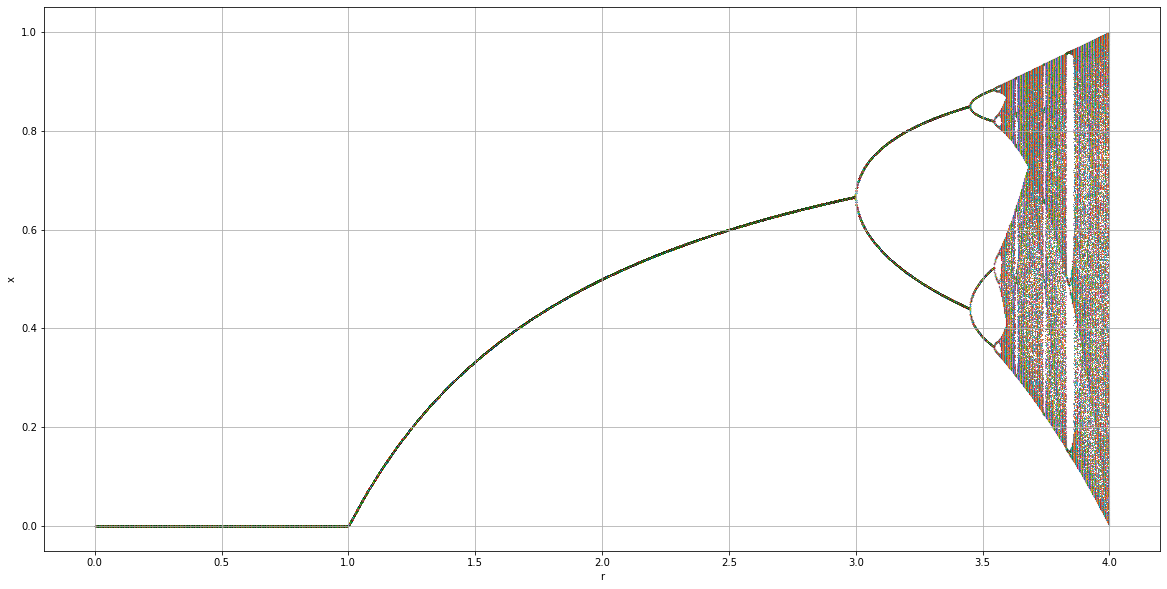

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.grid()
ax.set_xlabel('r')
ax.set_ylabel('x')

for r, exp in zip(r_values, x_exp):
    ax.scatter(np.ones_like(exp) * r, exp, cmap='autumn', marker='.', s=2, linewidths=0.3)

fig.show()

In [36]:
IMG_SAVEPATH = 'img'
os.makedirs(IMG_SAVEPATH, exist_ok=True)

In [37]:
fig.savefig(os.path.join(IMG_SAVEPATH, 'mandelbrot.png'))

## Julia set

- fix a value of C (can be 0)
- implement the map, plot the
evolution of z (Re(z), Im(z))
- play around with values of z0, see the
change of evolution
- for a given z0 if the sequence
converges use black color, if it
exponentially diverges use white
color, if it starts jumping between “n”
values use different colors
- plot the Julia set

In [38]:
def generate_next_z(z: complex, c: complex=0) -> complex:
    return z ** 2 + c

def run_julia_experiment(z_init: complex, c: complex=0, n_steps: int=100, z_bound: Optional[int] = None):
    z_r = []
    z_i = []
    z = z_init
    
    for i in range(1000):
        if z_bound is not None and cmath.polar(z)[0] > z_bound:
            break
        z = generate_next_z(z, c)
        z_r.append(z.real)
        z_i.append(z.imag)
        
    return z_r, z_i, i

def viz_julia_experiment(z_real: list, z_imag: list, c:int, figsize=(8, 8)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.plot(z_real, z_imag, '.')
    ax.set_xlabel('$\Re(z)$')
    ax.set_ylabel('$\Im(z)$')

    ax.set_title('$z_{n+1} = z_n^2 + c$' + '\t' * 4 + f'c = {c}')
    return fig

Toy example

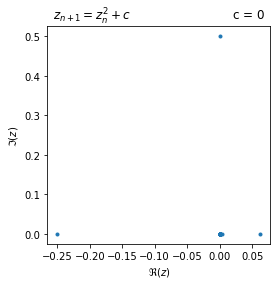

In [39]:
z = 0.5 + 0.5j
c = 0

z_real, z_imag, _ = run_julia_experiment(z, c)
viz_julia_experiment(z_real, z_imag, c, figsize=(4, 4)).show()

### Static example from wiki

https://en.wikipedia.org/wiki/Julia_set

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Julia_0.285_0.01.png" width="300" height="200"/>

In [40]:
def generate_julia_image(c: complex, z_mod_bound: int=2, img_size_side: int=500, n_steps=100):
    res = np.linspace(-1.5, 1.5, imsize)
    ims = np.linspace(-1.5, 1.5, imsize)

    image = np.zeros((imsize, imsize))

    for i, r in enumerate(res):
        for j, im in enumerate(ims):   
            exp_res, exp_ims, stop_iter = run_julia_experiment(complex(r, im), c, n_steps, z_mod_bound)

            image[i][j] = stop_iter / n_steps  # vary brightness by iterations
    return image

In [41]:
from matplotlib.ticker import FormatStrFormatter

def plot_julia_image(image: np.ndarray, figsize: Tuple[int]=(10, 10), fontsize: int=12):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.imshow(image, cmap='binary')
    ax.set_xlabel('$\Re(z)$', fontsize=fontsize)
    ax.set_ylabel('$\Im(z)$', fontsize=fontsize)
    ax.set_title('$z_{n+1} = z_n^2 + c$' + '\t' * 4 + f'c = {c}', fontsize=fontsize)

    ticks = np.arange(0, imsize + 100, 100)

    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ticks_labels = [f'{tick:.2f}' for tick in np.linspace(-1.5, 1.5, int(imsize / 100) + 1)]

    ax.set_xticklabels(ticks_labels)
    ax.set_yticklabels(ticks_labels)

    return fig

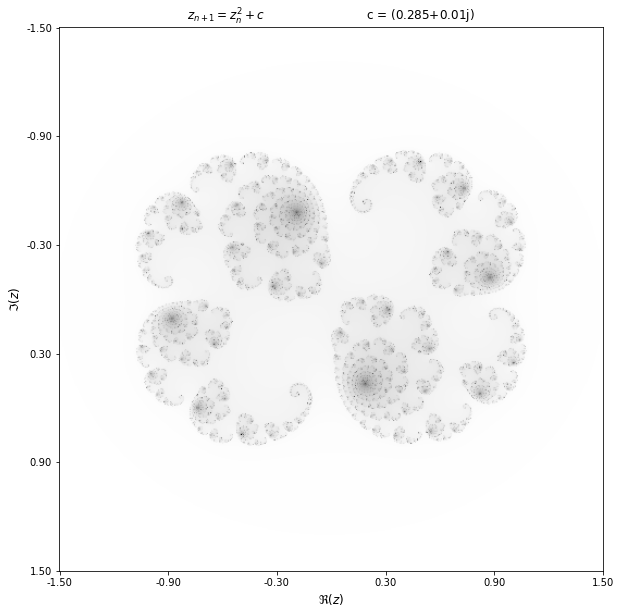

In [45]:
c = 0.285 + 0.01j  # wiki example

imsize = 500
z_mod_bound = 2


img = generate_julia_image(c, z_mod_bound)

julia_fig = plot_julia_image(img, figsize=(14, 11), fontsize=12)

In [46]:
julia_fig.savefig(os.path.join(IMG_SAVEPATH, 'julia.png'))

### Golden ratio example

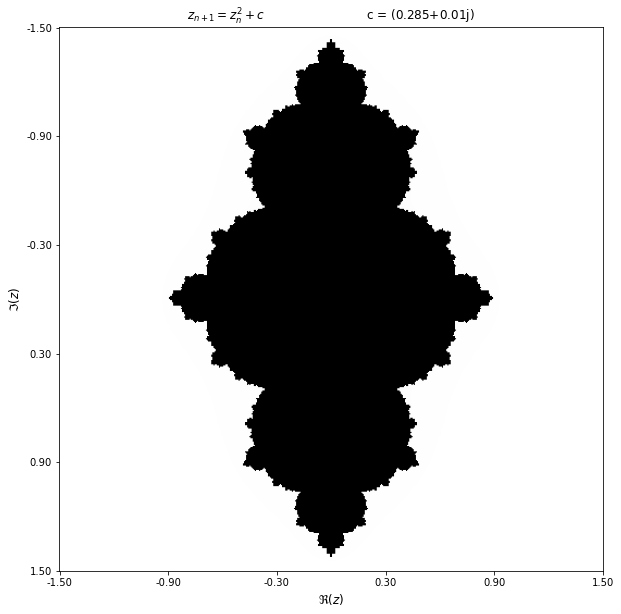

In [47]:
phi = (1 + cmath.sqrt(5)) / 2

img = generate_julia_image(complex(1 - phi, 0), z_mod_bound)
plot_julia_image(img, figsize=(14, 11), fontsize=12).show()

### Mandelbrot

In [48]:
n_steps = 500
z_mod_bound = 2
imsize = 500

res = np.linspace(-1.5, 1.5, imsize)
ims = np.linspace(-1.5, 1.5, imsize)

image = np.zeros((imsize, imsize))

for i, r in enumerate(res):
    for j, im in enumerate(ims): 
        exp_res, exp_ims, stop_iter = run_julia_experiment(0, complex(r, im), n_steps, z_mod_bound)

        image[i][j] = stop_iter / n_steps  # vary brightness by iterations

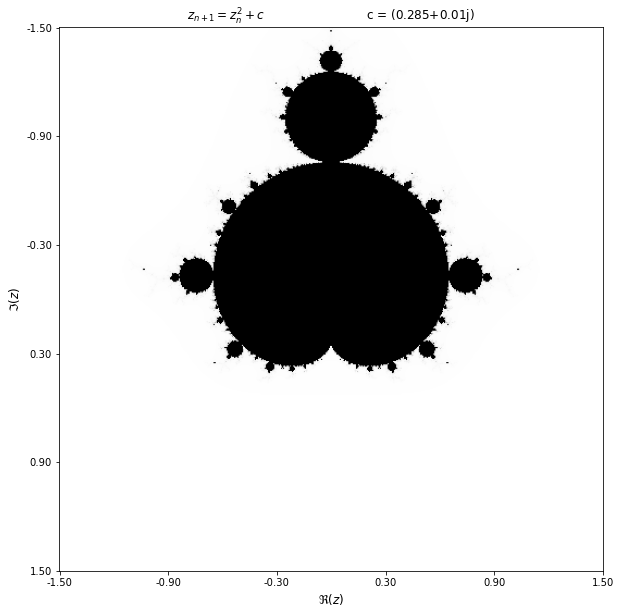

In [49]:
plot_julia_image(image, figsize=(14, 11), fontsize=12).show()

### Animated

In [50]:
a = np.linspace(0, 2 * math.pi, 60)

In [51]:
frames = []
for param in tqdm(a):
    c = cmath.exp(param * 1j)
    img = generate_julia_image(c, n_steps=1000)
    frames.append(img)

100%|██████████| 60/60 [01:09<00:00,  1.15s/it]


In [60]:
import imageio

In [ ]:
img_path = os.path.join(IMG_SAVEPATH, 'julia_images')
os.makedirs(img_path, exist_ok=True)
for i, img in enumerate(tqdm(frames)):
    img = plot_julia_image(img)
    img.savefig(os.path.join(img_path, f'{i}.png'))

In [64]:
gif_images = []
for i in range(len(frames)):
    gif_images.append(imageio.imread(os.path.join(img_path, f'{i}.png')))

imageio.mimsave(os.path.join(IMG_SAVEPATH, 'julia.gif'), gif_images, duration=0.15)

/tmp/ipykernel_12325/4198776744.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(os.path.join(img_path, f'{i}.png')))


##  Schelling model

1) Suppose there are two types of agents: X and O. Two populations of the two
agent types are initially placed into random locations of a neighborhood
represented by a grid. After placing all the agents in the grid, each cell is either
occupied by an agent or is empty.

2) Now we must determine if each agent is satisfied with its current location. A
satisfied agent is one that is surrounded by at least t percent of agents that are
like itself. This threshold t is one that will apply to all agents in the model.

3) When an agent is not satisfied, it can be moved to any vacant location in the grid.
Any algorithm can be used to choose this new location. For example, a randomly
selected cell may be chosen, or the agent could move to the nearest available
location.

4) All dissatisfied agents must be moved in the same round. After the round is complete,
a new round begins, and dissatisfied agents are once again moved to new locations in the grid.

 

Steps:
1. Randomize the map with half white/half black
2. define the value of R (0, ⅛, 2/8, ⅜, 4/8, ⅝,6/8,⅞, 1), start the game
3. on each step for each cell find out if the cell wants to move - this
cell is now on the market (considered free for moving in)
4. after you finished with the whole map - cells that want to move
can move into free cells
5. repeat the whole procedure

In [65]:
def is_cell_satisfied(grid: np.ndarray, x: int, y: int, satis_ratio: float) -> bool:
    n_neighbours = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            n_neighbours += grid[(x + i) % grid.shape[0],
                                 (y + j) % grid.shape[1]]

    if n_neighbours / 8 < satis_ratio:
        return False
    else:
        return True


def make_cell_step(grid: np.ndarray, x: int, y: int):
    available_locations = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            if grid[(x + i) % grid.shape[0]][(y + j) % grid.shape[1]] == 0:
                available_locations.append(
                    ((x + i) % grid.shape[0], (y + j) % grid.shape[1]))
    
    if available_locations:
        new_location = available_locations[np.random.randint(0, len(available_locations))]
    else:
        matched = False
        while not matched:
            rand_x = np.random.randint(0, grid.shape[0])
            rand_y = np.random.randint(0, grid.shape[1])
            if grid[rand_x][rand_y] == 0:
                new_location = (rand_x, rand_y)
                matched = True
            
    grid[x][y] = 0
    grid[new_location[0], new_location[1]] = 1


def simulate_model_step(grid: np.ndarray, satis_ratio: float):

    new_grid = grid.copy()

    moving_candidates = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x][y] == 1 and not is_cell_satisfied(grid, x, y, satis_ratio):
                moving_candidates.append((x, y))

    for candidate in moving_candidates:
        make_cell_step(new_grid, candidate[0], candidate[1])
    
    return new_grid, len(moving_candidates)


def create_grid(size: int, bw_ratio: float):
    grid = np.zeros((size**2))
    grid[:int(size**2 * bw_ratio)] += 1
    np.random.shuffle(grid)
    grid = grid.reshape((size, size))
    return grid


def simulate_schelling_experiment(
    grid_size: int,
    n_rounds: int,
    satis_ratio: float,
    black_white_ratio: float = 0.5
):
    grid = create_grid(grid_size, black_white_ratio)
    game_log = [grid]
    candidates_log = []
    
    for round_num in tqdm(range(n_rounds)):
        new_grid, moved = simulate_model_step(grid, satis_ratio)
        game_log.append(new_grid)
        candidates_log.append(moved)
        
    return game_log, candidates_log

def plot_schelling_grid(image: np.ndarray, figsize: Tuple[int]=(10, 10), fontsize: int=12):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    ax.imshow(image, cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig

### Run experiments for different satisfaction ratios

In [66]:
satisfaction_ratios = [i / 8 for i in range(9)]

In [ ]:
grid_size = 150
n_rounds = 50

schelling_img_path = os.path.join(IMG_SAVEPATH, 'schelling_images')
switches_logs = []

os.makedirs(schelling_img_path, exist_ok=True)

for ratio in tqdm(satisfaction_ratios):
    game_log, switches_log = simulate_schelling_experiment(grid_size, n_rounds, ratio)
    switches_logs.append(switches_log)
    
    experiment_path = os.path.join(schelling_img_path, f'ratio_{ratio}')
    os.makedirs(experiment_path, exist_ok=True)
    
    for i, img in enumerate(game_log):
        img = plot_schelling_grid(img)
        img.savefig(os.path.join(experiment_path, f'{i}.png'))

### Create gifs

In [71]:
for ratio in tqdm(satisfaction_ratios):
    gif_images = []
    experiment_path = os.path.join(schelling_img_path, f'ratio_{ratio}') 

    for i in range(n_rounds):
        gif_images.append(imageio.imread(os.path.join(experiment_path, f'{i}.png')))

    imageio.mimsave(os.path.join(schelling_img_path, f'schelling_{ratio}.gif'), gif_images, duration=0.15)

  0%|          | 0/9 [00:00<?, ?it/s]/tmp/ipykernel_12325/358144337.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(os.path.join(experiment_path, f'{i}.png')))
100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


### Plot switches over time for different satisfaction ratios

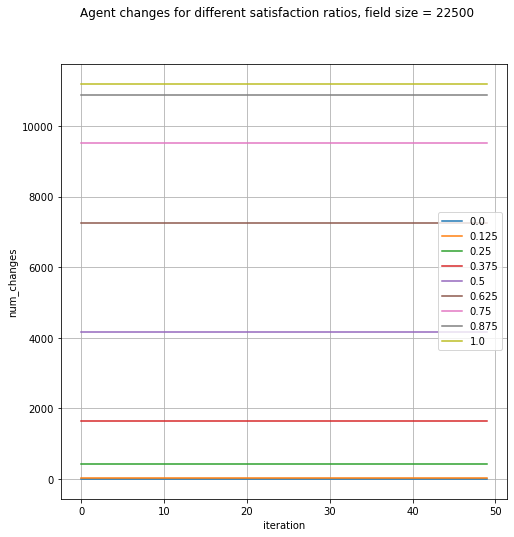

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for label, sw in zip(satisfaction_ratios, switches_logs):
    ax.plot(sw, label=label)
    ax.grid()
    ax.legend()

ax.set_ylabel('num_changes')
ax.set_xlabel('iteration')

fig.suptitle(f'Agent changes for different satisfaction ratios, field size = {grid_size**2}')
fig.show()